# ¿Cómo desplegamos la fuerza policial de Chicago para luchar eficazmente contra el crimen?

# Parte 1

In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/Curso Data Science para todos/Datos/'

/content/gdrive/My Drive/Curso Data Science para todos/Datos


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 16.7 MB 269 kB/s 
     |████████████████████████████████| 6.3 MB 43.3 MB/s 


In [5]:
import pandas              as pd 
import numpy               as np 
import matplotlib.pyplot   as plt 
import seaborn             as sns; sns.set() 
import branca
import geopandas

import folium 
from wordcloud import WordCloud 
from scipy.stats import ttest_ind 
from IPython.display import display
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)

_"Creo que fue así como empezó Chicago. Un grupo de personas en Nueva York dijo: 'Vaya, estoy disfrutando del crimen y la pobreza, pero simplemente no hace suficiente frío'. Vamos al oeste."_ - Richard Jeni

_"Chicago es conocida por sus buenos filetes, sus tiendas caras y su hermosa arquitectura. Desafortunadamente, la Ciudad de los Vientos también goza de una reputación de política corrupta [y] delitos violentos."_ - Bob Barr

## Metas (3 min)

El análisis exploratorio de datos es una de las partes más importantes de la ciencia de datos. Este caso se basa este caso para fomentar una mayor práctica con un enfoque en la implementación técnica. Esperamos que después de este caso los estudiantes puedan pensar críticamente y hacer preguntas lógicas, así como también tener la capacidad técnica para investigar esas preguntas. Las capacidades técnicas en este caso se refieren principalmente a la utilización de visualizaciones de datos, la manipulación de DataFrames en `pandas` y la creación de funciones personalizadas de Python para cuantificar métricas.

## Introdduccion (5 min)

**Contexto de Negocio.** ¡Felicidades! Recientemente fue ascendido a Jefe de Estrategia regional del Departamento de Policía de Chicago. Tiene muchos años de experiencia con el trabajo de campo, pero esta es la primera vez que tiene que pensar en el panorama general. Chicago es una ciudad grande y sus recursos son limitados. Por lo tanto, debe diseñar un plan integral para mejorar la eficiencia del despliegue de la fuerza policial para combatir el crimen. Tomar decisiones basadas en datos es esencial, incluso en la aplicación de la ley, donde el conocimiento previo generalmente domina el proceso de toma de decisiones.

**Problema de Negocio.** Su tarea principal es **explorar los datos e identificar patrones de delincuencia en Chicago, y desarrollar estrategias para desplegar de manera eficiente su fuerza laboral para luchar contra la delincuencia**

**Contexto analitico.**  Entonces, encontró un conjunto de datos disponible para el Departamento de Policía de Chicago de 2017 con información sobre delitos cometidos en toda la ciudad. En este caso, nos centraremos en el análisis exploratorio para construir algunas estrategias preliminares para el despliegue policial. Estas estrategias pueden consolidarse o descartarse aún más mediante un análisis estadístico más riguroso. Uno de los aspectos clave de este caso es que nuestros datos contienen registros de incidentes delictivos en los que a menudo no tenemos una definición clara del resultado (como la "gravedad" de un delito). Analizaremos las formas de tratar estos datos y cómo se pueden incorporar para obtener conclusiones significativas.

El caso está estructurado de la siguiente manera. (1) analizaremos resúmenes univariados (2) elaboraremos una estrategia preliminar basada en esto (3) analizaremos las distribuciones conjuntas y revisaremos nuestra estrategia, y finalmente (4) pensaremos en cambiar las estrategias en función de nuestras prioridades y la gravedad de la situación. crímenes.

## Explorando patrones asociados con variables individuales de interes (5 min)
Leamos y veamos nuestro conjunto de datos. Este conjunto de datos se descarga de este [website](https://data.cityofchicago.org/Public-Safety/Crimes-2017/d62x-nvdr). Contiene incidentes delictivos denunciados (con la excepción de asesinatos, donde existen datos para cada víctima) que ocurrieron en la ciudad de Chicago en 2017.

Comenzamos el caso con una exploración básica de la distribución de los distintos parámetros. Dado que este conjunto de datos está más enfocado en datos categóricos, comenzaremos investigando las diversas frecuencias de cada categoría dentro de cada parámetro:

In [6]:
df = pd.read_csv('Chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267173,11035993,JA367627,1/1/17 0:00,026XX W COYLE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,50.0,2,20,1157570.0,1946019.0,2017,2/10/18 15:50,42.007638,-87.695614,"(42.007638503, -87.695613598)"
267174,10942975,JA261045,1/1/17 0:00,035XX S GILES AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,"SCHOOL, PUBLIC, BUILDING",True,False,...,2.0,35,2,1178842.0,1881615.0,2017,2/10/18 15:50,41.830450,-87.619323,"(41.830450306, -87.61932306)"
267175,10942796,JA260938,1/1/17 0:00,028XX N WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,OTHER,False,False,...,1.0,21,26,1159863.0,1918955.0,2017,2/10/18 15:50,41.933326,-87.687927,"(41.933326413, -87.687927299)"
267176,10801141,JA100083,1/1/17 0:00,011XX W DICKENS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,43.0,7,08B,1168452.0,1914119.0,2017,2/14/17 15:49,41.919874,-87.656504,"(41.919874416, -87.656503702)"


Podemos ver arriba que la tabla contiene 22 columnas y hay 268,303 registros en total. Dado que cada caso de homicidio puede tener más de una fila, el número real de casos es menor a 268,303. Blow es una breve descripción de cada columna:

|     Variable name    |                    Variable description                    |                                                                                                  Note                                                                                                  |
|:--------------------:|:----------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|          ID          |              Unique identifier for the record              |                                                                   Each victim in a single homicide case is assigned to a different ID                                                                  |
|      Case Number     | The Chicago Police Department RD (Records Division) number |                                                  Unique to the incident. Multiple IDs can share the same Case Number if the incident is a homicide case                                                 |
|         Date         |               Date when the incident occurred              |                                                                                Might be a best estimate for some records                                                                               |
|         Block        | The partially redacted address where the incident occurred |                                                                    The redacted address is in the same block as the actual address                                                                    |
|         IUCR         |          The Illinois Uniform Crime Reporting code         |                                Directly linked to the primary type and the description of the crime. See details [here]( https://data.cityofchicago.org/widgets/c7ck-438e)                                |
|     Primary Type     |          The primary description of the IUCR code          |      -                                                                                                                                                                                                  |
|      Description     |         The secondary description of the IUCR code         |     -                                                                                                                                                                                                   |
| Location Description |   Description of the location where the incident occurred  |    -                                                                                                                                                                                                    |
|        Arrest        |                  Whether an arrest as made                 |     -                                                                                                                                                                                                   |
|       Domestic       |          Whether the incident was domestic-related         |                                                                Domestic-related definition is based on the Illinois Domestic Violence Act                                                               |
|       beat_num       |         The police beat where the incident occurred        |          Smallest police geographic area - each beat has a dedicated police beat car. See details [here](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74)         |
|       District       |       The police district where the incident occurred      | Three to five beats make up a police sector and three sectors make up a police district. See details [here](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r) |
|         Ward         |            The ward where the incident occurred            |                          Wards are city council districts. See details [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Wards-2015-/sp34-6z76)                          |
|    Community Area    |       The community area where the incident occurred       |                                     See details [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6)                                    |
|       FBI Code       |   The crime classification as outlined in the FBI's NIBRS  |                         NIBRS stands for National Incident-Based Reporting System (NIBRS). See details [here]( http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html)                         |
|       Latitude       |  The latitude of the location where the incident occurred  |                                                   This location is shifted from the actual location for partial redaction but falls on the same block                                                  |
|       Longitude      |  The longitude of the location where the incident occurred |       -                                                                                                                                                                                                 |

Hay bastantes factores, pero la mayoría son: (1) información de identificación (por ejemplo, `id`,` ICUR`); o (2) demasiado granular para empezar (p. ej.,  `latitude`, `longitude`). Por lo tanto, primero nos centraremos en las siguientes variables: `primary_type`,` description`, `location_description` (tipos de ubicación),` date` (hora de ocurrencia) y `beat_num` (ubicación geográfica), que brindan información valiosa. Nuestro resultado de interés es el número de incidentes delictivos.

## Investigando crimenes por tipos y descripciones(25 min)

Al igual que en el último caso de EDA, tiene sentido explorar la relación de `primary_type` y `description` con nuestro resultado de interés, los incidentes delictivos. Sin embargo, no podemos repetir el proceso exacto en el que observamos las correlaciones por pares entre las variables de interés y el resultado. Esto se debe a que tanto `primary_type` como` description` son variables categóricas, por lo que no sería necesario enviarlas para colocarlas en un diagrama de dispersión y calcular las correlaciones tiene poco sentido.

Afortunadamente, las dosvariables son discretas y podemos mantener el conteo sobre el numero de los registros que pertencen a cierta categoria para cada una de estas dos variables usando una [**frequency table**](https://www.onlinemathlearning.com/frequency-tables.html). Note que `primary_type` y `description` son [**nested variables**](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/anova-models/what-are-crossed-and-nested-factors/), que significa que cada tipo de `primary_type` tiene descripciones que no se solapan. Si dos crimenes tienen diferente `primary types` entonces ellos no pueden tener la misma  `description` por definicion.

In [7]:
df["Primary Type"].value_counts()

THEFT                                64354
BATTERY                              49218
CRIMINAL DAMAGE                      29043
ASSAULT                              19304
DECEPTIVE PRACTICE                   18081
OTHER OFFENSE                        17235
BURGLARY                             13000
ROBBERY                              11879
NARCOTICS                            11659
MOTOR VEHICLE THEFT                  11385
CRIMINAL TRESPASS                     6815
WEAPONS VIOLATION                     4686
OFFENSE INVOLVING CHILDREN            2282
CRIM SEXUAL ASSAULT                   1631
PUBLIC PEACE VIOLATION                1498
INTERFERENCE WITH PUBLIC OFFICER      1087
SEX OFFENSE                           1031
PROSTITUTION                           735
HOMICIDE                               675
ARSON                                  444
GAMBLING                               191
LIQUOR LAW VIOLATION                   191
KIDNAPPING                             190
STALKING   


Podemos ver que el tipo principal de delito más común es el robo, seguido de la agresión y los daños criminales. Los tipos más graves, como el homicidio, el incendio provocado y la trata de personas, son muy raros. En la columna `Description` se incluye una descripción más detallada de los tipos de delitos. Podemos desglosar aún más las frecuencias anteriores por `Description`, ya que `Primary Type` y `Description` son variables anidadas. La tabla de frecuencias resultante se muestra a continuación:

### Ejercicio 1

Escribir un codigo usando [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para contar el numero de casos en todas las combinacionesde ``Primary Type`` y ``Description``. Luego oranice los resultados en orden decreciente del numero de casos. Con base en estos resultados cuales son las descripciones de crimenes que mas impactan a Chicago?

In [11]:
df.groupby(["Primary Type","Description"])["ID"].count().reset_index(name="count").sort_values(by="count", ascending = False).reset_index(drop=True)

,Primary Type,Description,count
0,THEFT,$500 AND UNDER,24515
1,BATTERY,DOMESTIC BATTERY SIMPLE,23819
2,BATTERY,SIMPLE,16185
3,THEFT,OVER $500,15351
4,CRIMINAL DAMAGE,TO PROPERTY,13843
...,...,...,...
326,INTERFERENCE WITH PUBLIC OFFICER,OFFICIAL MISCONDUCT,1
327,INTIMIDATION,EDUCATIONAL INTIMIDAITON,1
328,INTIMIDATION,INTIMIDATION OF LAW ENFORCEMENT OFFICIAL,1
329,NON-CRIMINAL,NOTIFICATION OF STALKING - NO CONTACT ORDER,1


**Respuesta.** 
Resumir los datos mediante esta clasificación más detallada de tipos de delitos revela cuáles son las descripciones de delitos prevalentes dentro de cada tipo primario. Por ejemplo:

1. Más de la mitad de los delitos de robo involucraron artículos valorados en $ 500 o menos (hurto menor-petty theft)
2. La simple agresión doméstica (Simple domestic battery) es casi tan frecuente como los robos menores
3. La mayoría de los casos de daños penales involucraron propiedades o vehículos.

Hay de hecho 310 descripciones en total y enlistarlos a todos no es muy viable. Sin embargo podemos usar una herramienta de visualicacion conocida como [**word cloud**](https://www.boostlabs.com/what-are-word-clouds-value-simple-visualizations/) para hacer el resumen de las descripciones mas relevantes dentro de cada primary type. Un word cloud permite visualizar las palabras dentro de una coleccion de textos (en nuestro caso, los textos son cada una de las `Descriptions` para cada primary type) y el tamaño de cada palabra es proporcional a que tan seguido aparece en la base de datos. Construimos 3  word clouds para el top 3 para tipos de crimenes con mas prevalencia

(-0.5, 399.5, 199.5, -0.5)

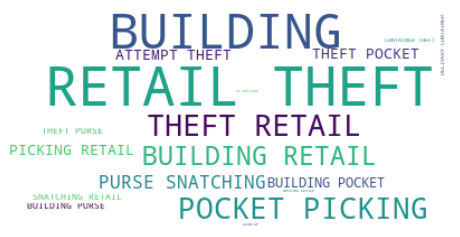

In [14]:
df_filter = df[df["Primary Type"]=='THEFT']
text = ' '.join(df_filter['Description'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [ ]:
df["Primary Type"].value_counts().index[1]

'BATTERY'

In [19]:
df["Primary Type"].value_counts().index[3]

'ASSAULT'

In [20]:
def wordcloud_crime(df,rank):
    df_filter = df[df["Primary Type"]==df["Primary Type"].value_counts().index[rank]]
    text = ' '.join(df_filter['Description'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Crime type:  ASSAULT


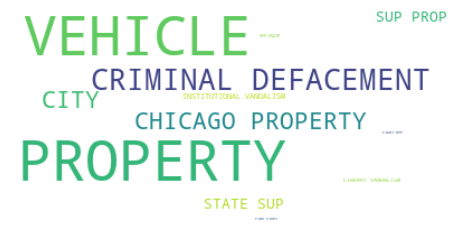

In [23]:
print("Crime type: ", df["Primary Type"].value_counts().index[3])
wordcloud_crime( df, rank=2 )

A partir de la nube de palabras anterior, parece que las palabras "building" y "retail" están fuertemente vinculadas a delitos de robo, lo que indica que el robo probablemente ocurrió principalmente en interiores y en centros comerciales o tiendas minoristas.

### Ejercicio 2:
Usar el codigo anterior para generar un wordcloud de battery cases y criminal cases. Cuales son las palabras mas comunes para describir estos dos tipos de casos

Crime type:  BATTERY


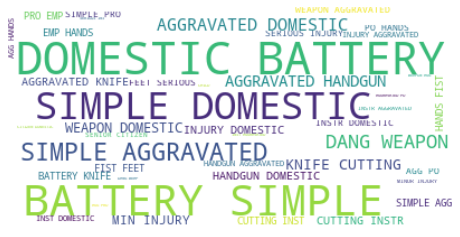

Crime type:  CRIMINAL DAMAGE


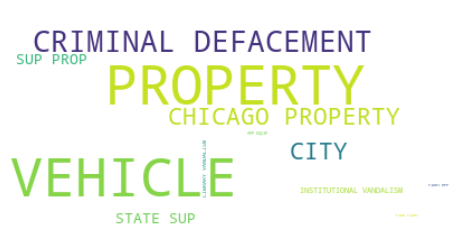

In [24]:
print("Crime type: ", df["Primary Type"].value_counts().index[1])
wordcloud_crime( df, rank=1 )
print("Crime type: ", df["Primary Type"].value_counts().index[2])
wordcloud_crime( df, rank=2 )

**Respuesta.**  La agresión está fuertemente ligada a la palabra "doméstico", lo que implica que las cargas de la batería suelen afectar a miembros de la familia. El daño criminal estuvo fuertemente asociado con las palabras "propiedad" y "vehículo", lo que indica los objetivos de la mayoría de los casos de daños criminales.

### Ejercicio 3: 
Como hemos visto con las nubes de palabras, parece que un tipo determinado de delito suele estar vinculado a determinados tipos de ubicaciones (por ejemplo, en casa, en tiendas minoristas). Escriba un código para investigar los patrones delictivos asociados con los tipos de ubicaciones delictivas. Según los resultados, ¿qué tipos de ubicaciones tienen más probabilidades de tener delitos?

**Respuesta**: Debido a que `Location Description` es una variable discreta,podemos usar el mismo codigo que usamos para `Primary Type`. Basados en los resultados, podemos encontrar la calle, residencia, apartamentos y calles con alrededor 50% de los incidentes.

In [25]:
df["Location Description"].value_counts()

STREET                     59975
RESIDENCE                  45880
APARTMENT                  33448
SIDEWALK                   21006
OTHER                      11327
                           ...  
CTA PROPERTY                   1
GAS STATION DRIVE/PROP.        1
RIVER BANK                     1
BASEMENT                       1
CLUB                           1
Name: Location Description, Length: 128, dtype: int64

#### Tablas de contingencia

Hasta el momento hemos visto los patrones de crimenes asociados con `Primary Type` y `Location Description` separadamente. Tiene sentido analizar cierto tipo de combinacion de tipo de crimen y tipo de ubicacion es prevalente o no. Sabemos que `Primary Type` y `Location Description` son variables discreatas. Luego entonces podemos usar una [**contingency table**](http://mathworld.wolfram.com/ContingencyTable.html) (cross table) para resumir el total de indidentes que pertenecen a cierta combinacion de valores de `Primary Type` y `Location Description`.

No podemos usar el codigo previo donde analizamos `Primary Type` y `Description` al mismo tiempo ya que a diferencia de esas dos variables, `Location Description` y `Primary Type` **NO** son nested variables. Podemos usar la funcion `crosstab` en `pandas` para generar la tabla de contingencia de estas dos variables

### Ejercicio 4: 

#### 4.1

`crosstab(var1, var2)` genera la tabla de contingencia para `var1` vs. `var2`. Use esta funcion para generar una tabla de contingencia de `Primary Type` vs. `Location Description` donde solo se muestren el top 10 de las localizaciones prevalentes y tipos de crimenes.

In [28]:
df["Location Description"].value_counts().index[:10]

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'RESTAURANT', 'SMALL RETAIL STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'ALLEY'],
      dtype='object')

In [30]:
df_1 = df[df["Location Description"].isin(df["Location Description"].value_counts().index[:10]) & 
          df["Primary Type"].isin(df["Primary Type"].value_counts().index[:10])]

In [31]:
pd.crosstab(index=df_1["Primary Type"],columns=df_1["Location Description"])

Location Description,ALLEY,APARTMENT,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SIDEWALK,SMALL RETAIL STORE,STREET
Primary Type,,,,,,,,,,
ASSAULT,485,2839,753,499,3189,495,541,2189,363,3533
BATTERY,1038,11706,1021,849,10136,815,692,6812,321,6732
BURGLARY,18,3956,494,40,4170,29,312,6,319,49
CRIMINAL DAMAGE,434,3767,804,1442,5524,828,433,251,347,9997
DECEPTIVE PRACTICE,19,1762,2261,201,6225,20,925,226,601,965
MOTOR VEHICLE THEFT,196,70,277,861,307,299,15,29,9,8217
NARCOTICS,646,613,136,319,730,235,40,3264,28,3013
OTHER OFFENSE,158,2473,1355,158,6697,146,185,593,175,3451
ROBBERY,929,235,230,383,234,171,195,3513,366,3548


#### 4.2
Según la tabla de contingencia anterior, ¿cuáles son los puntos calientes de los 10 tipos de delitos más prevalentes? ¿Son iguales o no?

**Respuesta.** No, el robo es muy diferente a los demás. El robo se extiende ampliamente en muchos lugares, mientras que los otros se concentran en unos pocos lugares.

#### 4.3

¿Cómo puede la tabla anterior ayudarlo a implementar su fuerza laboral de manera eficiente?

**Respuesta.** Este análisis es más útil cuando queremos identificar puntos calientes para un tipo específico de delito. Por ejemplo, si el departamento de policía considera la eliminación del robo como una prioridad, entonces la tabla anterior puede indicarnos dónde debemos desplegar más fuerzas policiales para combatir el robo. La tabla nos da las siguientes ideas:

1. Aparte del robo, todos los tipos principales de delitos tienden a concentrarse en menos de cinco tipos de ubicaciones, lo que indica que el patrullaje de ubicaciones específicas es más eficiente para combatir esos tipos de delitos.
2. Los delitos de robo tienden a extenderse a todo tipo de ubicaciones. Es el tipo de delito que requeriría más recursos para controlar.

## Investigando el crimen en el tiempo
Pasamos ahora a investigar la relación entre los incidentes delictivos y el tiempo; es decir, la variable `Date` que señalamos al principio. El tiempo es una de las dimensiones más importantes para construir un plan de implementación eficaz. Dado que no podemos patrullar todos los lugares las 24 horas del día, los 7 días de la semana, debemos apuntar a períodos de tiempo con altos índices de criminalidad. `Date` nos da una marca de tiempo para cada incidente, lo que nos permite contar cuántos incidentes ocurrieron dentro de un período de tiempo determinado. Dado que tenemos un año de datos, podemos comenzar con el total de incidentes mensuales para ver si ciertos meses son propensos a la delincuencia.

Hemos cubierto algunos casos relacionados con datos temporales y generalmente los agrupamos por diferentes unidades de tiempo (días, semanas, meses) para descubrir diferentes perspectivas a partir de los datos. A medida que investigamos desde una perspectiva temporal, es importante mantener el concepto de [variables de confusión](https://www.statisticshowto.datasciencecentral.com/experimental-design/confounding-variable/) que introdujimos en el Caso en nuestras mentes. Un ejemplo sería descubrir un patrón con respecto a junio y julio que tienen más delitos, pero el factor subyacente es en realidad la temperatura. Si Chicago tuviera un septiembre particularmente caluroso en el futuro, un científico de datos cuidadoso esperaría más crímenes en lugar de simplemente concluir que septiembre siempre tiene menos crímenes que junio / julio.

### Ejercicio 5

#### 5.1

Convierta la columna `Date` al tipo de fecha y hora y obtenga el mes para cada registro. Utilice la función calculada `month` y` groupby` y grafique el número total de casos en cada mes.

In [32]:
df["date_py"] = pd.to_datetime(df.Date)

In [33]:
df["month"] = df.date_py.dt.month

In [34]:
df.groupby(['month'])['ID'].count().reset_index(name="count")

,month,count
0,1,21929
1,2,19190
2,3,20419
3,4,21576
4,5,23257
5,6,23717
6,7,24713
7,8,24599
8,9,22671
9,10,22769


In [35]:
def plot_time( df, time_var, title, rot = 0):
    res = df.groupby([time_var])['ID'].count().reset_index(name="count")
    p = res.plot(x = time_var, y = "count", title = title, rot = rot)
    return p

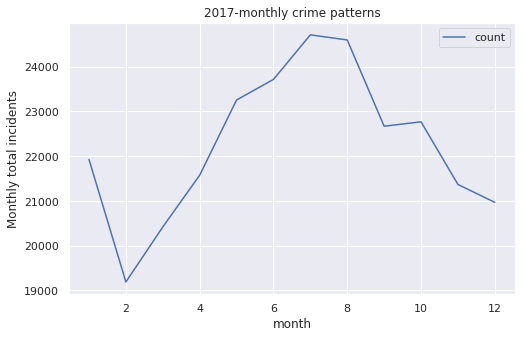

In [36]:
df["month"] = df.date_py.dt.month
p_monthly = plot_time( df, "month", "2017-monthly crime patterns")
_ = plt.ylabel("Monthly total incidents")

#### 5.2 

¿Qué meses tienen tasas de criminalidad relativamente más altas? ¿Por qué?

**Respuesta.** Febrero tiene el número más bajo de incidentes totales y el pico de incidentes delictivos en julio. En general, ocurrieron más incidentes durante el verano. Esto tiene sentido porque Chicago es frío y ventoso en el invierno, ¡y ni a los perpetradores ni a las víctimas les gusta estar fuera de casa mucho entonces!

#### 5.3 

Modifique su código para los incidentes totales mensuales y, en su lugar, trace la serie temporal de los incidentes totales diarios a lo largo de 2017. ¿Todavía cree que febrero es el momento en el que la delincuencia es menos preocupante?

**Respuesta.** Una posible solucion

In [ ]:
p_daily = plot_time( df, "date_new", "2017 daily crime patterns", rot = 45)
_ = plt.ylabel("Daily total incidents")

KeyError: ignored

Podemos ver que la mayoría de los días de marzo tuvieron menos incidentes totales que la mayoría de los días de febrero. Entonces, ¿por qué observamos una discrepancia entre el gráfico mensual y el gráfico diario? La razón es simple: febrero tiene 28 días, mientras que marzo tiene 31 días, por lo que es probable que el total mensual de febrero sea el más pequeño.

## Usando normalizacion para una comparacion justa

Por lo tanto, si queremos comparar el nivel de delincuencia en diferentes meses, el total mensual probablemente no sea una buena métrica, ya que los diferentes meses tienen diferentes números de días. Para resolver este problema, **normalizaremos** el total mensual en alguna métrica que no depende de la cantidad de días en un mes. La normalización de nuestros datos es muy común y el método apropiado de normalización generalmente está determinado por el conocimiento del dominio y el proceso de generación de hipótesis que aprendió recientemente en el Caso. Desea ver consistentemente cómo se desarrollan sus hipótesis en sus datos dividiendo los datos de varias maneras (una normalizando ciertos parámetros para una mejor comparación).

Una opción natural es dividir el total mensual por la cantidad de días en un mes. El valor normalizado es de hecho el promedio de incidentes diarios en un mes, que se pueden comparar entre diferentes meses. Echemos un vistazo a los resultados si usamos esta normalización. A partir de esto, queda claro que marzo es, de hecho, el mes menos preocupante:


In [ ]:
res = df.groupby(["month"])["ID"].count().reset_index(name="count")
res["count"] = res["count"]/[31,28,31,30,31,30,31,31,30,31,30,31]
res

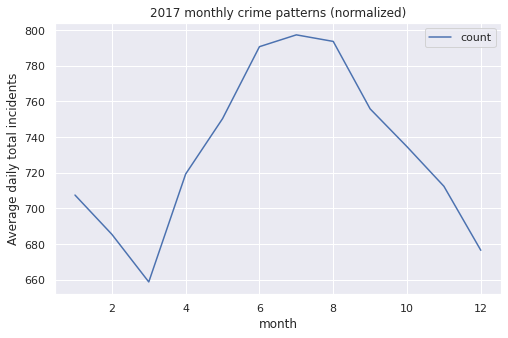

In [43]:
res = df.groupby(["month"])["ID"].count().reset_index(name="count")
res["count"] = res["count"]/[31,28,31,30,31,30,31,31,30,31,30,31]
_ = res.plot(x = "month", y = "count", title = "2017 monthly crime patterns (normalized)")
_ = plt.ylabel("Average daily total incidents")

### Ejercicio 6

Elija el enfoque de normalización correcto y modifique el código anterior para visualizar los patrones delictivos en todos los días de la semana. ¿Qué día de la semana tiene la mayor cantidad de casos?

**Respuesta.** Podemos visualizar el número total de incidentes que ocurrieron en un día específico de la semana y graficar estos recuentos en todos los días de la semana para examinar los patrones que estamos buscando. Pero como en el caso del patrón mensual, necesitamos normalizar estos recuentos brutos ya que, por ejemplo, hay un número diferente de lunes y domingos en 2017. Para un día determinado de la semana, podemos dividir el número total de incidentes que ocurrieron. en ese día de la semana por el número total de ese día de la semana en 2017. El resultado se interpreta como el promedio diario de incidentes totales. Tenga en cuenta que este promedio es a lo largo de todo el año, donde el promedio que consideramos en el caso de tendencia mensual es solo durante un mes determinado.

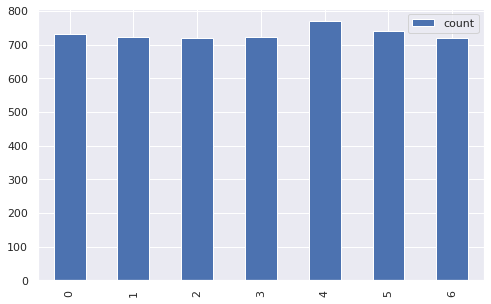

In [45]:
df["dayofweek"] = df.date_py.dt.dayofweek.astype("category")
df.dayofweek = df.dayofweek.cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res = df.groupby(["dayofweek"])['ID'].count().reset_index(name="count")
res['count'] = res['count']/pd.date_range("2017-1-1","2017-12-31",freq="D").dayofweek.value_counts()[::-1]
res.plot(kind='bar')

Encontramos que el viernes tiene incidentes totales significativamente más altos en comparación con todos los demás días de la semana. Los incidentes totales más bajos se alcanzan el miércoles.

# Parte 2

## Investigando el crimen por localizacion geografica


Otra dimensión importante que debemos considerar es la relación entre los incidentes delictivos y la ubicación geográfica. El aspecto técnico de la representación gráfica a continuación puede verse como una extensión de lo que hemos aprendido anteriormente sobre visualizaciones de datos. Le recomendamos que revise lentamente el código en su tiempo libre hasta que pueda replicarlo en un nuevo problema. La forma en que elijamos configurar estos gráficos siempre debe ser lógica y, en este caso, estamos categorizando los datos por golpes policiales.

Tenemos las coordenadas geográficas aproximadas de cada incidente y, en base a ellas, podemos explorar los patrones geográficos del crimen en Chicago. Para identificar los puntos críticos geográficos de delitos, podemos dividir la ciudad de Chicago en regiones que no se superpongan y contar el número total de casos en 2017 en cada región. En este caso, dividimos Chicago por ``beat_num``. Luego visualizamos los resultados en el mapa:

In [48]:
df["beat_num"] = df["beat_num"].str.zfill(4)
beat_cn = df.groupby("beat_num")["ID"].count().reset_index(name="crime_count")
beat_cn

,beat_num,crime_count
0,0111,2263
1,0112,2251
2,0113,1164
3,0114,1305
4,0121,892
...,...,...
269,2531,796
270,2532,1218
271,2533,1500
272,2534,1399


In [49]:
beat_cn['crime_count'].quantile([0.01,0.99]).apply(round, 2)

0.01     288
0.99    2210
Name: crime_count, dtype: int64

In [50]:
# estandarizar cantidad de ceros al inicio
df["beat_num"] = df["beat_num"].str.zfill(4)
beat_cn = df.groupby("beat_num")["ID"].count().reset_index(name="crime_count")

# color scheme
min_cn, max_cn = beat_cn['crime_count'].quantile([0.01,0.99]).apply(round, 2)

colormap = branca.colormap.LinearColormap(
    colors=['white','yellow','orange','red','darkred'],
    #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=min_cn,
    vmax=max_cn
)

colormap.caption="Total crimes in Chicago by police beats"

In [51]:
beat_cn

,beat_num,crime_count
0,0111,2263
1,0112,2251
2,0113,1164
3,0114,1305
4,0121,892
...,...,...
269,2531,796
270,2532,1218
271,2533,1500
272,2534,1399


In [52]:
beat_orig = geopandas.read_file("Boundaries_beat.geojson", driver = "GeoJSON")
beat_orig

,beat,beat_num,district,sector,geometry
0,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ..."
1,5,1651,16,5,"MULTIPOLYGON (((-87.90684 41.97656, -87.91070 ..."
2,1,1914,19,1,"MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ..."
3,1,1915,19,1,"MULTIPOLYGON (((-87.63724 41.96599, -87.63644 ..."
4,1,1913,19,1,"MULTIPOLYGON (((-87.65967 41.96903, -87.65967 ..."
...,...,...,...,...,...
269,1,0314,03,1,"MULTIPOLYGON (((-87.58879 41.78612, -87.58844 ..."
270,2,0825,08,2,"MULTIPOLYGON (((-87.67917 41.78656, -87.67912 ..."
271,1,0313,03,1,"MULTIPOLYGON (((-87.60854 41.78583, -87.60808 ..."
272,2,0823,08,2,"MULTIPOLYGON (((-87.69354 41.78458, -87.69354 ..."


In [53]:
beat_data = beat_orig.join(beat_cn.set_index("beat_num"), how = "left", on = "beat_num")
beat_data.fillna(0, inplace = True)
beat_data

,beat,beat_num,district,sector,geometry,crime_count
0,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...",657
1,5,1651,16,5,"MULTIPOLYGON (((-87.90684 41.97656, -87.91070 ...",462
2,1,1914,19,1,"MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ...",974
3,1,1915,19,1,"MULTIPOLYGON (((-87.63724 41.96599, -87.63644 ...",640
4,1,1913,19,1,"MULTIPOLYGON (((-87.65967 41.96903, -87.65967 ...",718
...,...,...,...,...,...,...
269,1,0314,03,1,"MULTIPOLYGON (((-87.58879 41.78612, -87.58844 ...",831
270,2,0825,08,2,"MULTIPOLYGON (((-87.67917 41.78656, -87.67912 ...",1254
271,1,0313,03,1,"MULTIPOLYGON (((-87.60854 41.78583, -87.60808 ...",934
272,2,0823,08,2,"MULTIPOLYGON (((-87.69354 41.78458, -87.69354 ...",1524


In [54]:
# visualizacion interactiva para cada beat y su tasa de crimen en 2017
### CREACION DEL FONDO DEL MAPA
m_crime = folium.Map(location=[41.88, -87.63],zoom_start=12,tiles="OpenStreetMap")
## CREACION DE FUNCION ESTILO
style_function = lambda x: {
    'fillColor': colormap(x['properties']['crime_count']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}
# PROYECCION DE LOS POLIGONOS 
stategeo = folium.GeoJson(
    beat_data.to_json(),
    name='Chicago beats',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['beat_num', 'crime_count'],
        aliases=['Beat', 'Total crime'], 
        localize=True
    )
).add_to(m_crime)

colormap.add_to(m_crime)
m_crime

Output hidden; open in https://colab.research.google.com to view.

In [55]:
m_crime.save("paginaZZ.html")


En general, encontramos que hay tres puntos calientes en Chicago: el centro de Chicago, West Chicago y South Chicago. Puede desplazarse sobre cada región para ver el número de beats y el número total de delitos en el mismo.

### Ejercicio 7

#### 7.1

Según el análisis realizado hasta ahora, ¿cuáles son sus estrategias preliminares para el despliegue policial en función de los tiempos, lugares y tipos de delitos? ¿Cuál es el problema comercial potencial que está resolviendo aquí?

**Respuesta**: Basándonos en los resultados, tenemos varias sugerencias: poner más fuerza policial a trabajar los viernes, entre mayo y septiembre, y colocarlos en el centro de Chicago, así como en los lados oeste y sur de Chicago. Probablemente necesiten enfocarse en las calles y áreas residenciales y deben prestar atención al robo, agresión, daño criminal y asalto.

#### 7.2 

¿Cuál es la principal deficiencia de nuestro análisis y recomendaciones en 4.1?

**Respuesta:** Vemos dos escollos principales:

1. Las investigaciones anteriores son para patrones individuales asociados con cada variable individual, y los patrones asociados con todas estas variables independientes combinadas pueden no ser independientes. En otras palabras, pueden existir efectos de interacción entre estas variables.

2. Observamos anteriormente que la mayoría de los delitos tienden a estar relacionados con el robo. Sin embargo, la mayoría de los delitos de robo son menores, lo que podría no ser el tipo de delito en el que deberíamos centrar nuestra limitada fuerza policial. Los delitos más graves, como los casos de homicidio, se pasan por alto en los análisis anteriores, ya que son muy raros. Pero quizás estos delitos raros y graves sean los delitos más importantes que se deben prevenir.

El resto de este estudio de caso tiene como objetivo abordar estas dos deficiencias.

## Investigando distribuciones conjuntas e interacciones

En el ejercicio 7.2, citamos dos problemas potenciales al unir ingenuamente los patrones que notamos para cada variable individual en una recomendación. Abordamos la primera cuestión para empezar: pueden existir efectos de interacción entre las variables de interés. Ahora investigamos cada efecto de interacción potencial con más detalle y desafiamos nuestras hipótesis.

### Crime type vs. day of the week

De nuevo, podemos usar nuestra tabla de contingencia para resolver esto similar a lo que se hizo con `Primary Type` y `Location Description`. Un problema aquí es que necesita normalizar los datos para que las comparaciones sean justas en los diferentes días de la semana:

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
res_raw = pd.crosstab(df["Primary Type"], df.Date.dt.dayofweek)
res_raw/pd.date_range("2017-1-1","2017-12-31",freq="D").dayofweek.value_counts().tolist()[::-1]

Date,0,1,2,3,4,5,6
Primary Type,,,,,,,
ARSON,1.346154,1.173077,1.403846,1.230769,1.115385,1.038462,1.207547
ASSAULT,54.230769,53.942308,55.153846,53.730769,53.403846,49.076923,50.716981
BATTERY,129.884615,125.769231,123.596154,123.519231,129.942308,148.115385,162.547170
BURGLARY,37.076923,36.442308,38.788462,36.019231,41.903846,30.961538,28.264151
CONCEALED CARRY LICENSE VIOLATION,0.192308,0.153846,0.115385,0.230769,0.192308,0.250000,0.188679
CRIM SEXUAL ASSAULT,4.057692,3.634615,4.057692,3.403846,3.923077,5.538462,6.622642
CRIMINAL DAMAGE,80.057692,76.634615,73.423077,74.634615,78.269231,86.480769,87.339623
CRIMINAL TRESPASS,19.423077,18.519231,18.596154,20.000000,19.269231,18.096154,16.830189
DECEPTIVE PRACTICE,54.153846,52.403846,52.057692,53.057692,56.423077,44.576923,34.377358


### Ejercicio 8

Su colega afirma que la mayoría de los robos ocurren los lunes, martes o miércoles. ¿Cómo valida o refuta su afirmación según los datos y la tabla anterior? ¿Qué puede decir acerca de los días que tienen más incidentes de agresión y agresión?

**Respuesta.** De los resultados, vemos que el viernes tiene la mayor cantidad de casos de robo (~ 10% más que otros días), lo que refuta la primera afirmación. La agresión y el asalto tienen patrones diferentes. Los casos de agresión son más frecuentes los días de semana que los fines de semana (~ 10% más), mientras que los casos battery son más frecuentes los fines de semana (~ 15% más). Por lo tanto, el despliegue de más fuerzas policiales el viernes podría no funcionar para eliminar los delitos de agresión.

## Momento vs. ubicacion del crimen 

La próxima interacción potencial es entre la hora del crimen y el lugar del crimen. Los puntos calientes geográficos pueden cambiar de vez en cuando y apuntar a diferentes regiones en diferentes momentos es una estrategia natural para aumentar la eficiencia. El siguiente mapa muestra cómo varía geográficamente la tasa de criminalidad a lo largo del tiempo. Aquí, el resultado de interés es el promedio diario de incidentes totales:

In [ ]:
def folium_slider( beat_cn, beat_orig, tmp_drange, index_var, index_lab, 
                   value_var = "crime_count", caption = "Crimes in Chicago" ):
    # Obtener el colorbar
    min_cn, max_cn = beat_cn[value_var].quantile([0.01,0.99]).apply(round, 2)
    colormap = branca.colormap.LinearColormap(
        colors=['white','yellow','orange','red','darkred'],
        #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),
        vmin=min_cn,
        vmax=max_cn
    )
    colormap.caption=caption
    # obtener el styledata para folium
    styledata = {}
    for beat in range(beat_orig.shape[0]):
        res_beat = beat_cn[beat_cn.beat_num==beat_orig.iloc[beat,:].beat_num]
        #llenar faltantes con 0 : no hubo crimen en ese mes 
        c_count = res_beat.set_index(index_var)[value_var].reindex(tmp_drange).fillna(0)
        df_tmp = pd.DataFrame(
            {'color': [colormap(count) for count in c_count], 'opacity':0.5},
            index = index_lab
        )
        styledata[str(beat)] = df_tmp
    styledict = {
        str(beat): data.to_dict(orient='index') for
        beat, data in styledata.items()
    }
    # plot el mapa con el slider del tiempo
    m = folium.Map(location=[41.88, -87.63],
                        zoom_start=12,
                        tiles="OpenStreetMap")
    g = TimeSliderChoropleth(
        beat_orig.to_json(),
        styledict=styledict
    ).add_to(m)
    folium.GeoJson(beat_orig.to_json(), style_function = lambda x: {
        'color': 'black',
        'weight':2,
        'fillOpacity':0
    }, tooltip=folium.GeoJsonTooltip(
            fields=['beat_num'],
            aliases=['Beat'], 
            localize=True
        )).add_to(m)
    colormap.add_to(m)
    return m

In [ ]:
beat_cn_month = df.groupby(["beat_num","month"])["ID"].count().reset_index(name = "crime_count")
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cn_month = beat_cn_month.merge(nd, how = "left", on = "month")
beat_cn_month["crime_count"] = beat_cn_month["crime_count"]/beat_cn_month["days"]
folium_slider( beat_cn_month, beat_orig, list(range(1,13)), "month",
               list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
               caption = "Average daily total incidents in a month")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Ciclo en el año 
beat_cn_month = df.groupby(["beat_num","month"])["ID"].count().reset_index(name = "crime_count")
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cn_month = beat_cn_month.merge(nd, how = "left", on = "month")
beat_cn_month["crime_count"] = beat_cn_month["crime_count"]/beat_cn_month["days"]
folium_slider( beat_cn_month, beat_orig, list(range(1,13)), "month",
               list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
               caption = "Average daily total incidents in a month")

Output hidden; open in https://colab.research.google.com to view.

### Ejercicio 9

**Respuesta.** Está claro que el centro de Chicago sigue siendo un lugar de moda sin importar en qué mes estemos. Beat 0114 es una región especial. Tiene una tasa de criminalidad elevada solo en julio y agosto, probablemente debido a los turistas.

West Side Chicago requiere una atención especial de abril a octubre. Beat 1011 en esta área es propenso a la delincuencia durante todo el año.

South Side Chicago tiene un período caluroso de abril a agosto. Beat 0511 en esta área tiene una tasa de criminalidad constantemente alta durante todo el año, mientras que Beats 0833 y 0834 solo tienen altas tasas de criminalidad en enero.

Como podemos ver, las estrategias que desarrollamos en el ejercicio 7.1 necesitan perfeccionarse. Las observaciones anteriores nos dicen que debemos desplegarnos en diferentes áreas en diferentes épocas del año. De mayo a agosto es un período caluroso para la mayoría de las regiones que nos preocupan, pero algunos latidos están inundados de actividad criminal durante todo el año.

# Parte 3

## Priorizando la severidad del crimen: IUCR score 


Hasta ahora, hemos basado nuestro análisis solo en la tasa total de delincuencia. Pero no todos los delitos son igualmente dañinos. Un caso de homicidio afectaría gravemente a un vecindario incluso después de varios años y obstaculizaría el desarrollo comercial en el área. Por otro lado, un caso de hurto menor generalmente no es tan destructivo y sería descartado después de varias semanas.

Podemos definir un tipo diferente de resultado que enfatice los tipos de delitos que deben controlarse al nivel mínimo. Estos delitos generalmente están determinados por los planes de desarrollo municipal de Chicago. Por ejemplo, si el gobierno tiene como objetivo promover el turismo, los delitos dirigidos a los turistas, como el robo y las actividades engañosas, deberían ser el foco principal del departamento de policía.

En nuestro conjunto de datos, la columna "IUCR" es un código de informe que mide parcialmente el daño de un incidente al bienestar general del público. Usemos este código para definir un nuevo tipo de resultado que mida aproximadamente el daño acumulado de todos los delitos en un área durante un período de tiempo. La idea clave es que debemos centrarnos en los lugares y los momentos más perjudicados por los delitos, no necesariamente en los que tienen el mayor número total de incidentes delictivos.

### Crime severity: IUCR score

``IUCR`` representa Illinois Uniform Crime Reporting code, la descripcion se encuentra en [here](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data). Lo mas importante a resaltar es que **a medida que el codigo incrementa, la severidad asociada de los crimenes generlamente disminuye**. 

In [ ]:
df['IUCR'].head()

0     630
1     460
2     890
3    1320
4    041A
Name: IUCR, dtype: object

### Ejercicio 10

Algunos de los códigos IUCR tienen una letra después de ellos (A, P, B, R, C, T, N). Un examen del enlace anterior muestra que estas cartas son sobre condenas, lo cual no es demasiado relevante para nosotros. Escriba código para eliminar las letras y convertir esta columna a un tipo numérico. Luego use la función `hist` para visualizar la distribución de` IUCR`. También use la función `describe` para resumir` IUCR` (media, varianza, etc.). Según el histograma, ¿la mayoría de los casos tienen una IUCR grande (no grave)?

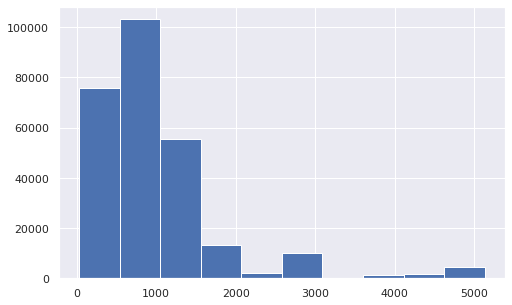

In [ ]:
# convertir la columna IUCR a numerica
iucr = (df['IUCR'].str.replace("A", "")
             .str.replace("P","")
             .str.replace("B","")
             .str.replace("R","")
             .str.replace("C","")
             .str.replace("T","")
             .str.replace("N","")
             .str.replace("E","")
             .str.replace("H","")
             .astype('int'))
_ = iucr.hist()

In [ ]:
iucr.describe()

count    267178.000000
mean       1017.423085
std         839.350262
min          31.000000
25%         486.000000
50%         820.000000
75%        1310.000000
max        5132.000000
Name: IUCR, dtype: float64

**Respuesta.** Podemos ver que la mayoría de los casos tienen una puntuación IUCR bruta inferior a 2000 y alrededor del 30% de los casos tienen una puntuación IUCR bruta inferior a 500. Esto significa que la mayoría de los casos en nuestro conjunto de datos se consideran moderadamente graves.

### Ejercicio 11
Dados estos puntajes de la IUCR, ¿cómo los integraría en nuestras visualizaciones de incidencia delictiva para que los resultados finales también representen la gravedad de los delitos en una región?

**Respuesta.** En todo nuestro análisis anterior, cada caso se cuenta como uno para el número total de incidentes. Podemos amplificar el efecto de ciertos tipos de delitos (por ejemplo, homicidio) con un factor de escala predefinido, que representa que un solo caso de homicidio debe considerarse tan grave como muchos delitos menores como el hurto. Al incorporar estos factores de escala, las regiones con menos casos pero más graves se identificarían como más peligrosas en comparación con los resultados de la visualización no ponderada. Una regla general es elegir los factores de escala para que sean positivos y más altos para los delitos más graves.

Usando el esquema de puntuación que discutimos anteriormente, consideremos la severidad del crimen mensual en los golpes policiales:

In [ ]:
# weighted incidence rate
iucr = iucr.fillna(0)
df["IUCR_num"] = iucr.max() - iucr
beat_cs_month = df.groupby(["beat_num","month"]).aggregate({"IUCR_num":lambda x: sum(x)}).reset_index()
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cs_month = beat_cs_month.merge(nd, how = "left", on = "month")
beat_cs_month["severity_tot"] = beat_cs_month["IUCR_num"]/beat_cs_month["days"]
folium_slider( beat_cs_month, beat_orig, list(range(1,13)), "month",
              list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
              value_var = "severity_tot", caption = "Average daily crime severity in Chicago")

Output hidden; open in https://colab.research.google.com to view.

Parece que los resultados aquí no son significativamente diferentes de los resultados que obtuvimos cuando no incorporamos "IUCR". Esto podría deberse a que la mayoría de los casos tienen una IUCR en bruto relativamente pequeña y, por lo tanto, tienden a tener una ponderación relativamente similar incluso cuando incorporamos la "IUCR".

### Definición de una puntuación de gravedad basada en el problema empresarial más amplio

Dado que "IUCR" no fue particularmente útil, definamos una métrica de gravedad diferente. En general, es una buena práctica definir una métrica que se alinee con el objetivo general que la ciudad está tratando de lograr. Por ejemplo, si queremos atraer a más empresas grandes para que abran sucursales en Chicago, es posible que nos interesen mucho los homicidios, las agresiones sexuales y los incendios provocados, pero menos los juegos de azar, la obscenidad y los robos. Este tipo de análisis es bastante subjetivo, pero con experiencia en el campo deberíamos tener una buena intuición sobre cómo se deben clasificar todos los tipos de delitos. Si queremos ser más objetivos, podríamos incluir otro conjunto de datos de delitos que han sido clasificados por el monto en dólares en pérdidas causadas por esos delitos. Comenzamos con un sistema de puntuación subjetivo como ejemplo:

In [ ]:
# La función zip crea una lista de tuplas de dos listas
# El primer elemento de cada tupla es el tipo de delito de la primera lista y el segundo elemento es el número de gravedad.

severity_10 = zip(['CRIM_SEXUAL_ASSAULT', 'ARSON', 'HOMICIDE'], [10] * 4)
severity_9 = zip(['BATTERY', 'ASSAULT','ROBBERY', 'BURGLARY'], [9] * 4)
severity_8 = zip(['MOTOR VEHICLE THEFT', 'PUBLIC PEACE VIOLATION',  'CRIMINAL DAMAGE'], [8] * 3)
severity_7 = zip(['CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING'], [7] * 3)
severity_6 = zip(['STALKING', 'PUBLIC INDECENCY'], [6] * 2)
severity_5 = zip(['OTHER OFFENSE', 'HUMAN TRAFFICKING'], [5] * 2)
severity_4 = zip(['DECEPTIVE PRACTICE', 'INTIMIDATION'], [4] * 2)
severity_3 = zip(['INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE'], [3] * 2)
severity_2 = zip(['NARCOTICS', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION','OBSCENITY'], [2] * 4)
severity_1 = zip(['THEFT','GAMBLING', 'PROSTITUTION', 'LIQUOR LAW VIOLATION', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL'], [1] * 5)

# Al convertir estas tuplas comprimidas en un diccionario, podemos asignar cada fila del conjunto de datos a su etiqueta de gravedad.
severities = dict()
for s in [severity_1, severity_2, severity_3, severity_4, severity_5, severity_6, severity_7, severity_8, severity_9, severity_10]:
    severities.update(dict(s))

# Al convertir estas tuplas comprimidas en un diccionario, podemos asignar cada fila del conjunto de datos a su etiqueta de gravedad.
df['severity_bus'] = df['Primary Type'].apply(severities.get)

Este esquema de ponderación es adecuado para visualizar la gravedad media por caso, pero no para la gravedad total. La razón es que el rango de pesos es bastante pequeño (1-10) y los delitos con pesos altos son raros. Como resultado, la suma ponderada dada por este esquema de ponderación es muy similar a la suma no ponderada y la visualización de la suma ponderada no proporciona información adicional. Por otro lado, la severidad promedio por caso está limitada entre 1 y 10. Por lo tanto, un pequeño cambio (por ejemplo, 0.1) en el promedio aún puede conducir a un cambio aparente en el color de relleno. Echemos un vistazo al promedio actualizado por puntaje de gravedad de caso:

In [ ]:
# tenga en cuenta que todavía tenemos que hacer la normalización por días
beat_cs_month = df.groupby(["beat_num","month"]).aggregate({"severity_bus":lambda x: sum(x)}).reset_index()
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cs_month = beat_cs_month.merge(nd, how = "left", on = "month")
beat_cs_month["severity_bus_tot"] = beat_cs_month["severity_bus"]/beat_cs_month["days"]
beat_cs_month["severity_bus_avg"] = beat_cs_month["severity_bus_tot"]/beat_cn_month["crime_count"]
folium_slider( beat_cs_month, beat_orig, list(range(1,13)), "month",
              list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
              value_var = "severity_bus_avg", caption = "Average crime severity in Chicago")

Output hidden; open in https://colab.research.google.com to view.

Este mapa esencialmente muestra las partes violentas de Chicago, ignorando el robo y poniendo énfasis en los crímenes más violentos. Bajo este esquema de priorización, vemos que el centro de Chicago ya no es la peor región; más bien, la peor región se ha convertido ahora en South Side Chicago. El lado norte "seguro" ahora está salpicado de ritmos bastante violentos.

## Conclusiones (10 min)

Exploramos los registros de delitos de Chicago en 2017 para comprender los patrones delictivos y propusimos estrategias preliminares de implementación de políticas basadas en estos patrones. Inicialmente examinamos los patrones asociados con cada variable de interés de forma independiente. Con base en los análisis de una sola variable, propusimos que el departamento de policía debería poner fuerzas adicionales a trabajar los viernes entre mayo y agosto, prestar más atención al robo, agresión, asalto y daño criminal, y desplegar más fuerzas en el centro de Chicago y el oeste y Lados sur de Chicago.

Luego, realizamos análisis para tres pares de variables y descubrimos que las estrategias anteriores son demasiado rígidas y no tienen en cuenta los efectos de interacción. Descubrimos que el viernes es un punto caliente semanal fuera del verano, pero durante el verano, o el sábado se convierte en el punto caliente o no hay ningún punto caliente presente. También encontramos que las ventanas de tiempo de alta actividad delictiva para los tres puntos calientes geográficos no son las mismas: el centro tiene una alta tasa durante todo el año, mientras que los delitos en las otras dos regiones se acumularon principalmente entre abril y agosto. Descubrimos que el robo es común en todo tipo de ubicaciones, mientras que otros tipos de delitos, como la agresión y el asalto, tienden a agruparse en muy pocos tipos de ubicaciones.

En la última parte del análisis, analizamos cómo personalizar las ponderaciones de los diferentes delitos en función del resultado comercial que estábamos optimizando. Consideramos una puntuación de gravedad personalizada, que destaca los casos extremadamente violentos, y descubrimos que muchas regiones de Chicago tienen un recuento general bajo de incidentes delictivos, pero altas tasas de delitos violentos. El centro de Chicago, por otro lado, no albergaba crímenes violentos a pesar de su alta tasa general de criminalidad. Esto indica que si la prioridad es eliminar los crímenes altamente violentos, se deben cambiar las estrategias previamente diseñadas y se debe poner más énfasis en lugares como North Side Chicago.

En el futuro, hay muchas cosas que podemos hacer. Con este conjunto de datos, podemos explorar otros efectos de interacción por pares. También podemos examinar si las estrategias que propusimos aquí ya se han implementado y si el plan de implementación en uso ahora es exitoso o no. También podemos considerar un modelo estadístico más avanzado para nuestro conjunto de datos, de modo que se puedan incluir todas las variables, y no solo las que examinamos. Para aquellos que estén interesados ​​en este tema, un buen punto de partida es [aquí](https://en.wikipedia.org/wiki/Spatial_analysis).

## Para llevar (5 min)

En este caso, aprendimos cómo realizar análisis de datos exploratorios para registros de delitos. Este tipo de datos no tiene un resultado de interés tan claro, por lo que comenzamos asumiendo que el resultado de interés es el número total de incidentes delictivos. A partir de ahí, seguimos un proceso similar al del último caso de EDA, excepto:

1. Al investigar las variables de interés, no usamos matrices de correlación porque tienen poco sentido para las variables categóricas.
2. En su lugar, usamos herramientas como tablas de frecuencia, nubes de palabras y tablas de contingencia. También utilizamos mapas con un control deslizante de tiempo para comprender los patrones espaciales y temporales.
3. También aprendimos la importancia de la normalización para asegurarnos de que está haciendo comparaciones de manzanas con manzanas.

Finalmente, cuestionamos nuestra suposición original de que el número de incidentes delictivos era el resultado más importante para optimizar. También analizamos cómo deberíamos ponderar los diferentes delitos de manera diferente en nuestro análisis en función del problema empresarial particular en cuestión.

El caso 4.3 se centró en la EDA para los parámetros numéricos, mientras que el caso 4.4 se centró en las variables categóricas. Simplemente no podemos exagerar la importancia de EDA para cualquier problema de ciencia de datos, por lo que le recomendamos que revise ambos casos de manera rigurosa. Si se siente cómodo con los conceptos y los aspectos técnicos de ambos casos, puede encontrar un conjunto de datos con una combinación de parámetros categóricos y numéricos en una plataforma como [Kaggle](https://www.kaggle.com/datasets) para practicar más. 